# Lesson 1: Installation and Introduction to NEURON for Python

## Lesson goals:

1. Use bash to install software and check system configuration
2. Configure NEURON as a module for python3
3. Use python datatypes: list and dict
4. Use python module numpy to operate on array datatype
5. Use python module matplotlib to plot data
6. Use python module neuron to create a neuronal cell body compartment and explore the attributes of sections and segments
7. Record voltage from a neuron segment, run a simulation, and plot recorded data
8. Organize recordings and superimpose results from multiple simulations
9. Insert an ion channel mechanism into the membrane of a neuron section and explore its attributes
10. Understand and measure the "input resistance" of a neuron compartment

## 1. Use bash to install software and check system configuration

`pwd`  # Print currently accessed directory 

`echo $HOME`  # print the contents of the bash variable `HOME`

`cd $HOME`  # change to the directory `HOME`

`echo $PATH`  # print the contents of the bash variable `PATH`

`which -a python`  # print the directories in the `PATH` that contain a version of python

`echo $PYTHONPATH`  # print the directories where python looks for modules to import

`mkdir src`  # create a new directory to put source code for python modules  
`export PYTHONPATH=$HOME/src:$PYTHONPATH`  # append this src directory to the `PYTHONPATH`

`ls -a`  # list all contents of current directory, including hidden files

`nano .zshrc`  # Use a simple text editor to view the configuration of the bash terminal (In Mac OSX Catalina, the default bash terminal is zsh)  
Add the above `"export"` line to `.zshrc` to permanently configure `PYTHONPATH`

## 2. Configure NEURON as a module for python3

`xcode-select --install`  # Install Mac command line tools

Start with a python3 installation with numpy, matplotlib, scipy (anaconda is a good option - https://docs.anaconda.com/anaconda/install/mac-os/)

Install XQuartz to enable NEURON’s graphics - http://xquartz.org

Install NEURON - https://www.neuron.yale.edu/neuron/download/precompiled-installers

`which nrnivmodl`  # find the location of the executable used by neuron to compile `.mod` files that define ion channel and synaptic mechanisms

`ipython  
from neuron import h`

## 3. Use python datatypes: list and dict

In [1]:
this_list = []  # or list()

In [2]:
this_list.append(1)  # add an item to the end of a list

In [3]:
print(this_list)

[1]


In [4]:
this_list.append(2)

In [5]:
print(this_list)

[1, 2]


In [6]:
# iterate over the values of the items in a list
for item in this_list:
    print(item)

1
2


In [7]:
# iterate over both the indexes and the values of the items in a list
for index, item in enumerate(this_list):
    print(index, item)

0 1
1 2


In [8]:
len(this_list)  # return the number of items in a list

2

In [9]:
this_list.remove(1)  # remove a specific item from a list

In [10]:
this_list.remove(3)  # what if the item is not in the list?

ValueError: list.remove(x): x not in list

In [11]:
print(this_list)

[2]


In [12]:
this_dict = {}  # or dict()

In [13]:
this_dict['key1'] = 'value1'  # associate a key with a value in a dictionary (keys can be instances of most types)

In [14]:
print(this_dict)

{'key1': 'value1'}


In [15]:
this_dict['key2'] = 'value2'

In [16]:
print(this_dict)

{'key1': 'value1', 'key2': 'value2'}


In [17]:
# by default iterating over a dict just returns the keys
for key in this_dict:
    print(key)

key1
key2


In [18]:
for key in this_dict.keys():
    print(key)

key1
key2


In [19]:
type(this_dict.keys())  # the keys() method returns a "view" of the keys, not a list of the keys

dict_keys

In [20]:
print(this_dict.keys())

dict_keys(['key1', 'key2'])


In [21]:
print(list(this_dict.keys()))  # you can convert a "view" into a list

['key1', 'key2']


In [22]:
# iterate over the values stored in a dictionary - may not be in the order you expect
for value in this_dict.values():
    print(value)

value1
value2


In [23]:
# iterate over both keys and values in a dictionary
for key, value in this_dict.items():
    print(key, value)

key1 value1
key2 value2


In [24]:
# iterate over both keys and values, as well as an index, or running count of the items in a dictionary
for index, (key, value) in enumerate(this_dict.items()):
    print(index, key, value)

0 key1 value1
1 key2 value2


In [25]:
this_dict.pop('key1')  # remove a specific key, value pair from a dictionary

'value1'

In [26]:
print(this_dict)

{'key2': 'value2'}


In [27]:
this_dict.pop('key3')  # what if the key is not in the dictionary?

KeyError: 'key3'

## 4. Use python module numpy to operate on array datatype

In [28]:
import numpy as np

In [29]:
this_array = np.array([0, 1, 2])

In [30]:
print(this_array)

[0 1 2]


In [31]:
type(this_array)

numpy.ndarray

In [32]:
this_array.shape

(3,)

In [33]:
len(this_array)

3

In [34]:
this_array = np.array(list(range(1, 4)))

In [35]:
print(this_array)

[1 2 3]


In [36]:
this_array = np.arange(1, 8, 2)

In [37]:
print(this_array)

[1 3 5 7]


In [38]:
for index, value in enumerate(this_array):
    print(index, value)

0 1
1 3
2 5
3 7


In [39]:
print(this_array[::-1])  # print the items in an array in reverse order

[7 5 3 1]


In [40]:
print(this_array[:2])  # print the first 2 items in an array

[1 3]


In [41]:
print(this_array[::2])  # print every 2nd item in an array

[1 5]


In [42]:
this_array[3] = 2  # change the value of an item in an array by referring to its index

In [43]:
print(this_array)

[1 3 5 2]


## 5. Use python module matplotlib to plot data

In [44]:
# allows plots inside a jupyter notebook to be interactive
%matplotlib notebook

In [45]:
import matplotlib.pyplot as plt

In [46]:
# why doesn't this work?
x = range(10)
y = 2 * x
print(x)
print(y)

plt.figure()  # start a fresh plot
plt.plot(x, y)
plt.show()

TypeError: unsupported operand type(s) for *: 'int' and 'range'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<IPython.core.display.Javascript object>


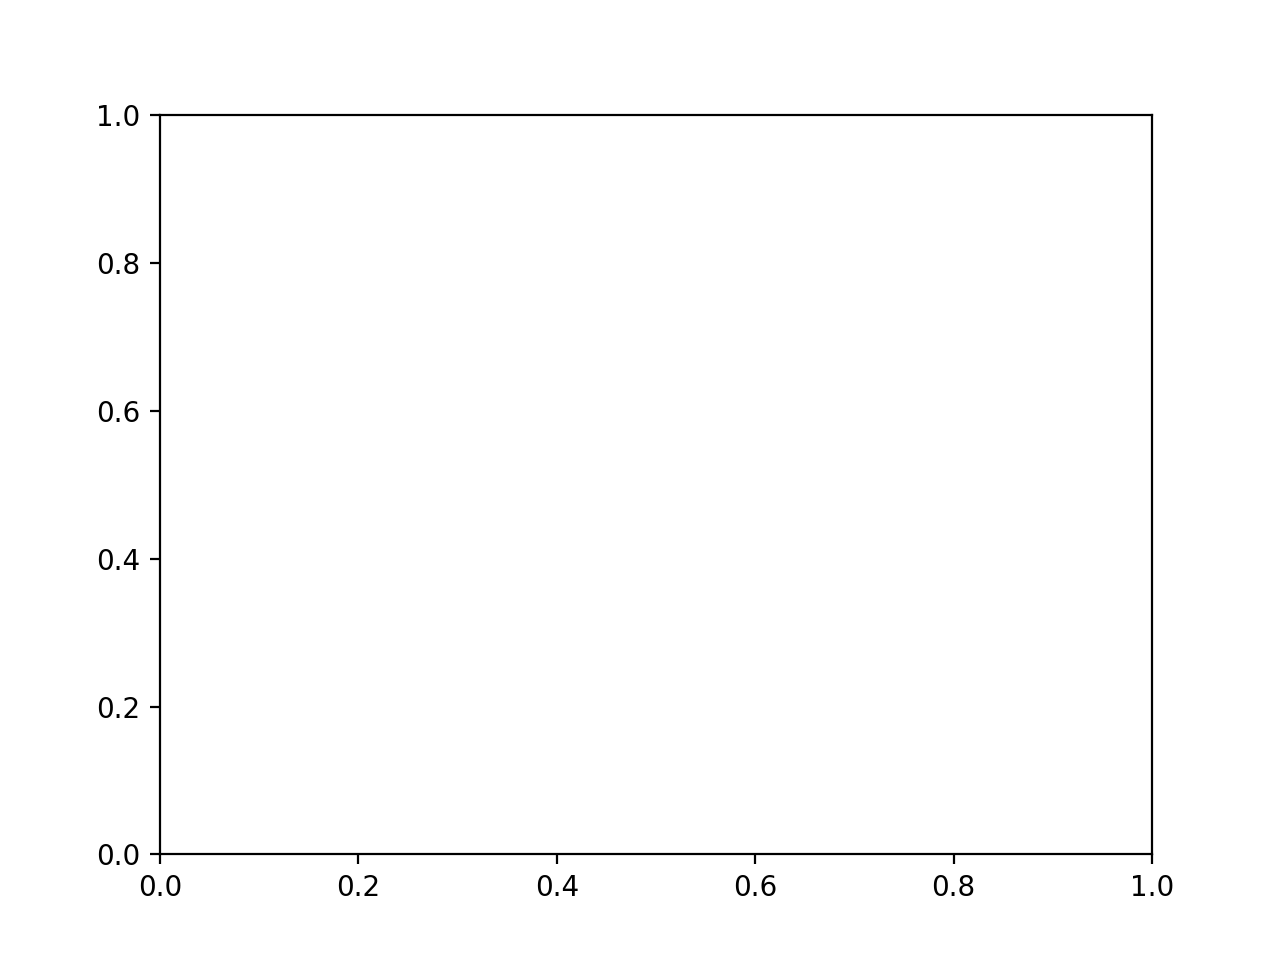

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

In [47]:
# why doesn't this work?
x = list(range(10))
y = 2 * x
print(x)
print(y)

plt.figure()  # start a fresh plot
plt.plot(x, y)
plt.show()

[0 1 2 3 4 5 6 7 8 9]
[ 0  2  4  6  8 10 12 14 16 18]


<IPython.core.display.Javascript object>


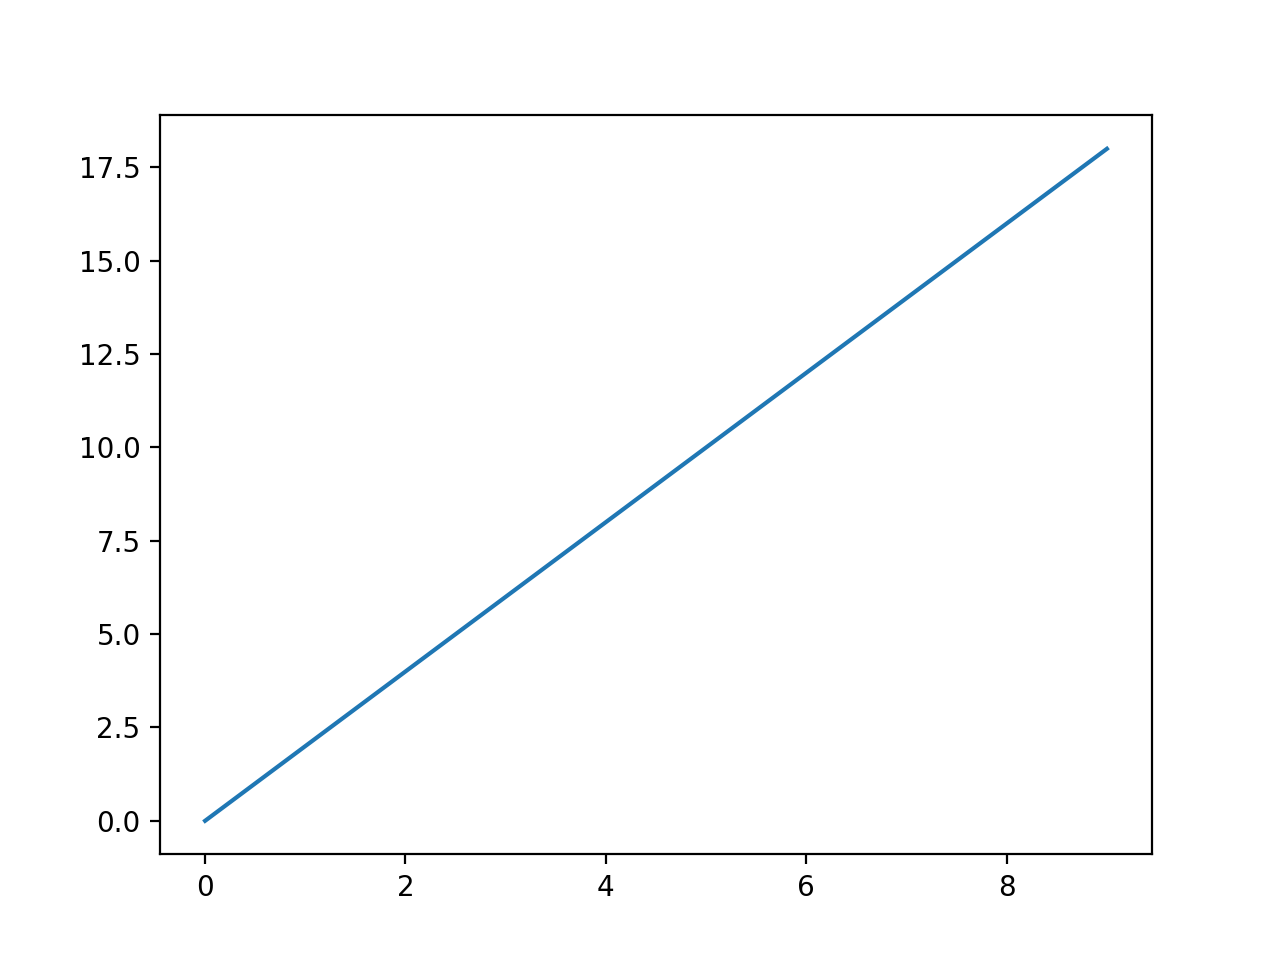

In [48]:
x = np.array(range(10))
y = 2 * x
print(x)
print(y)

plt.figure()  # start a fresh plot
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


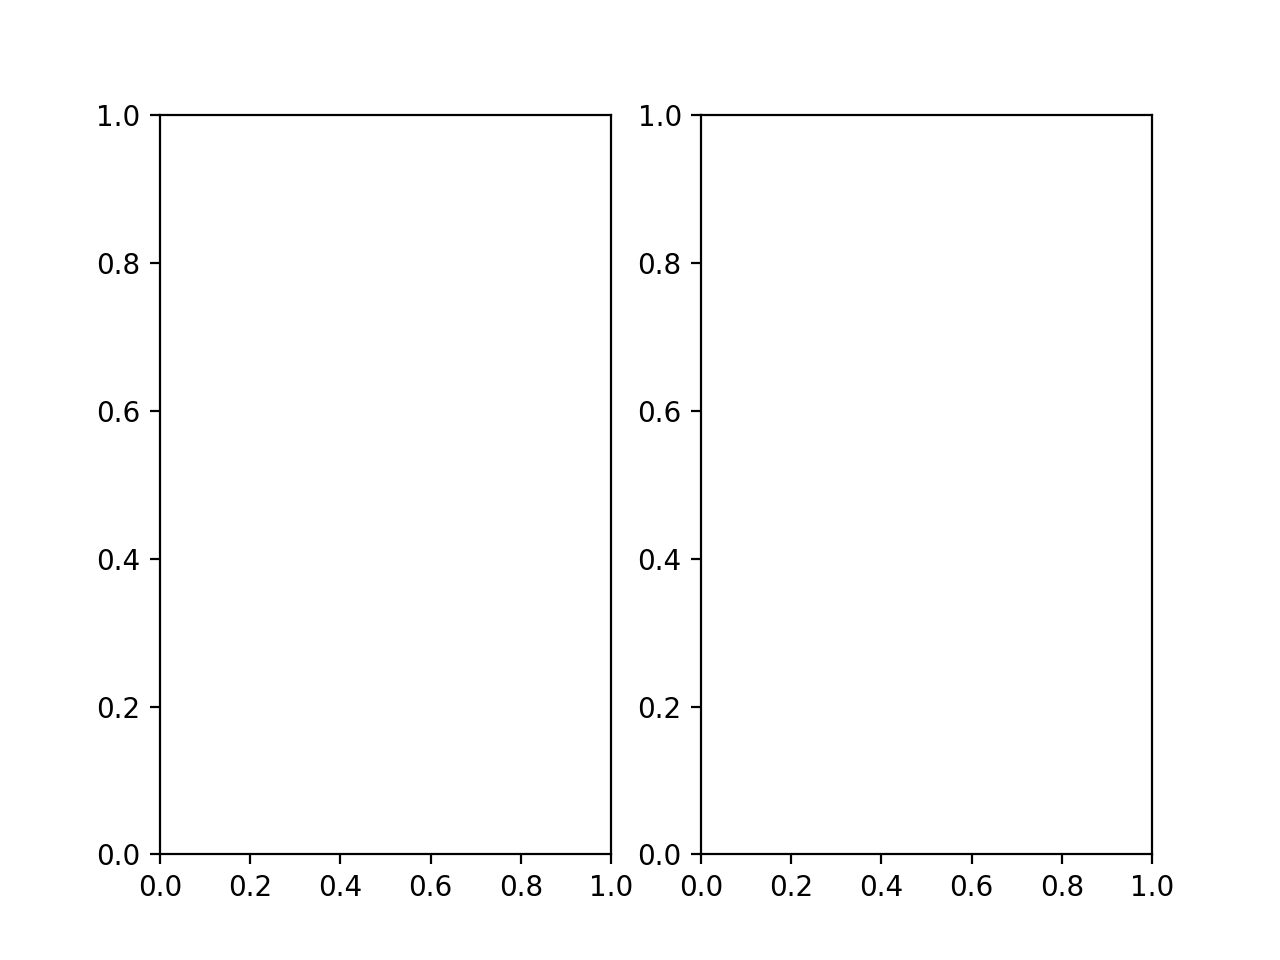

In [49]:
# get a bit fancier
fig, axes = plt.subplots(1, 2)

In [50]:
print(type(axes))

<class 'numpy.ndarray'>


In [51]:
print(axes.shape)

(2,)


<IPython.core.display.Javascript object>


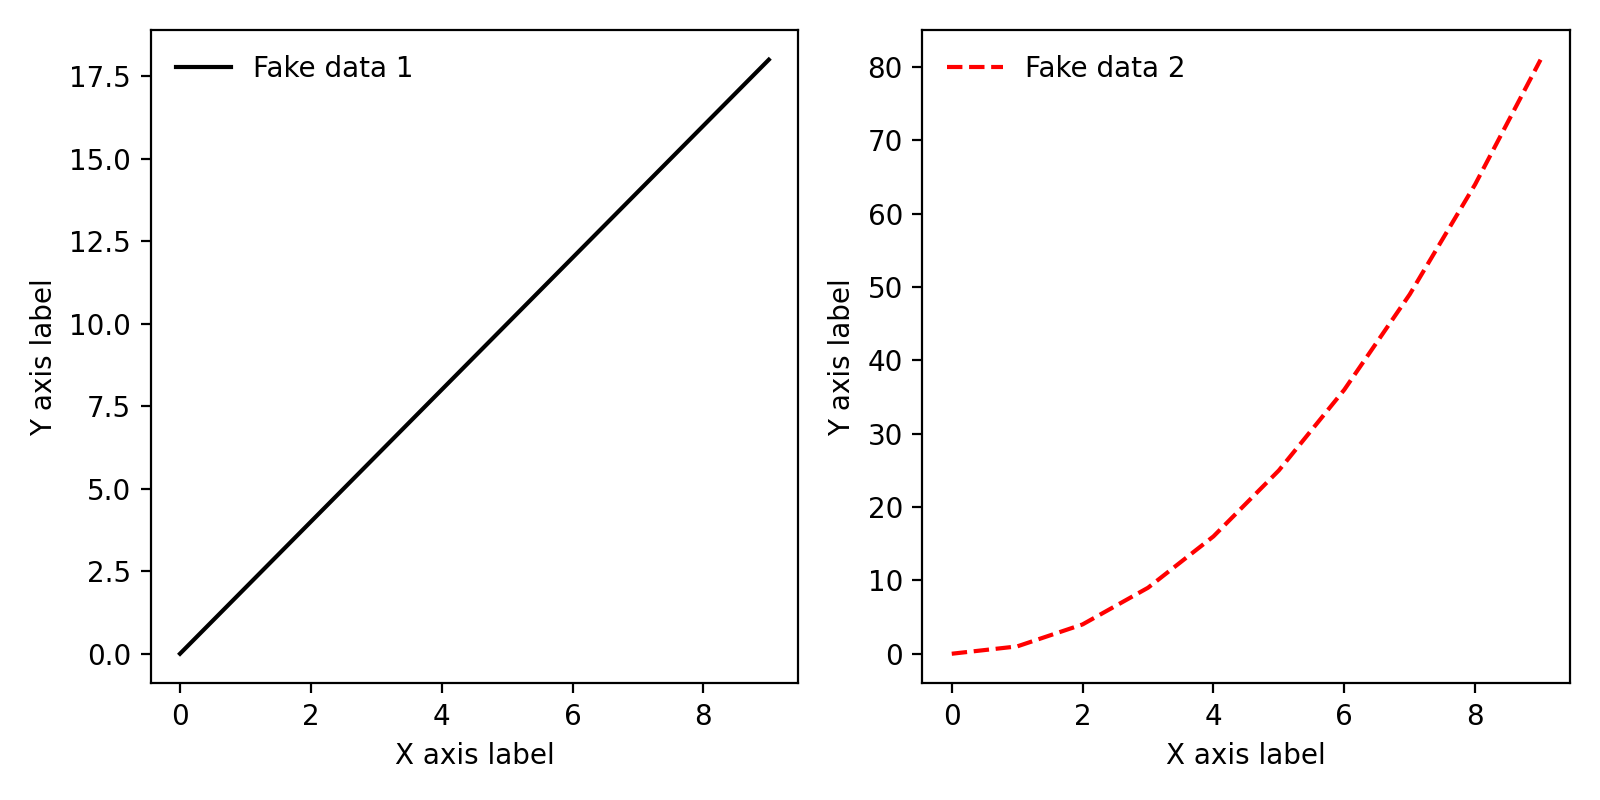

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(x, y, '-', c='k', label='Fake data 1')
axes[1].plot(x, x ** 2, '--', c='r', label='Fake data 2')
axes[0].set_xlabel('X axis label')
axes[1].set_xlabel('X axis label')
axes[0].set_ylabel('Y axis label')
axes[1].set_ylabel('Y axis label')
axes[0].legend(loc='best', frameon=False)
axes[1].legend(loc='best', frameon=False)
fig.tight_layout()

In [53]:
help(fig.tight_layout)

Help on method tight_layout in module matplotlib.figure:

tight_layout(renderer=<deprecated parameter>, pad=1.08, h_pad=None, w_pad=None, rect=None) method of matplotlib.figure.Figure instance
    Automatically adjust subplot parameters to give specified padding.
    
    To exclude an artist on the axes from the bounding box calculation
    that determines the subplot parameters (i.e. legend, or annotation),
    then set `a.set_in_layout(False)` for that artist.
    
    Parameters
    ----------
    renderer : subclass of `~.backend_bases.RendererBase`, optional
        Defaults to the renderer for the figure.  Deprecated.
    pad : float, optional
        Padding between the figure edge and the edges of subplots,
        as a fraction of the font size.
    h_pad, w_pad : float, optional
        Padding (height/width) between edges of adjacent subplots,
        as a fraction of the font size.  Defaults to *pad*.
    rect : tuple (left, bottom, right, top), optional
        A rectangl

<IPython.core.display.Javascript object>


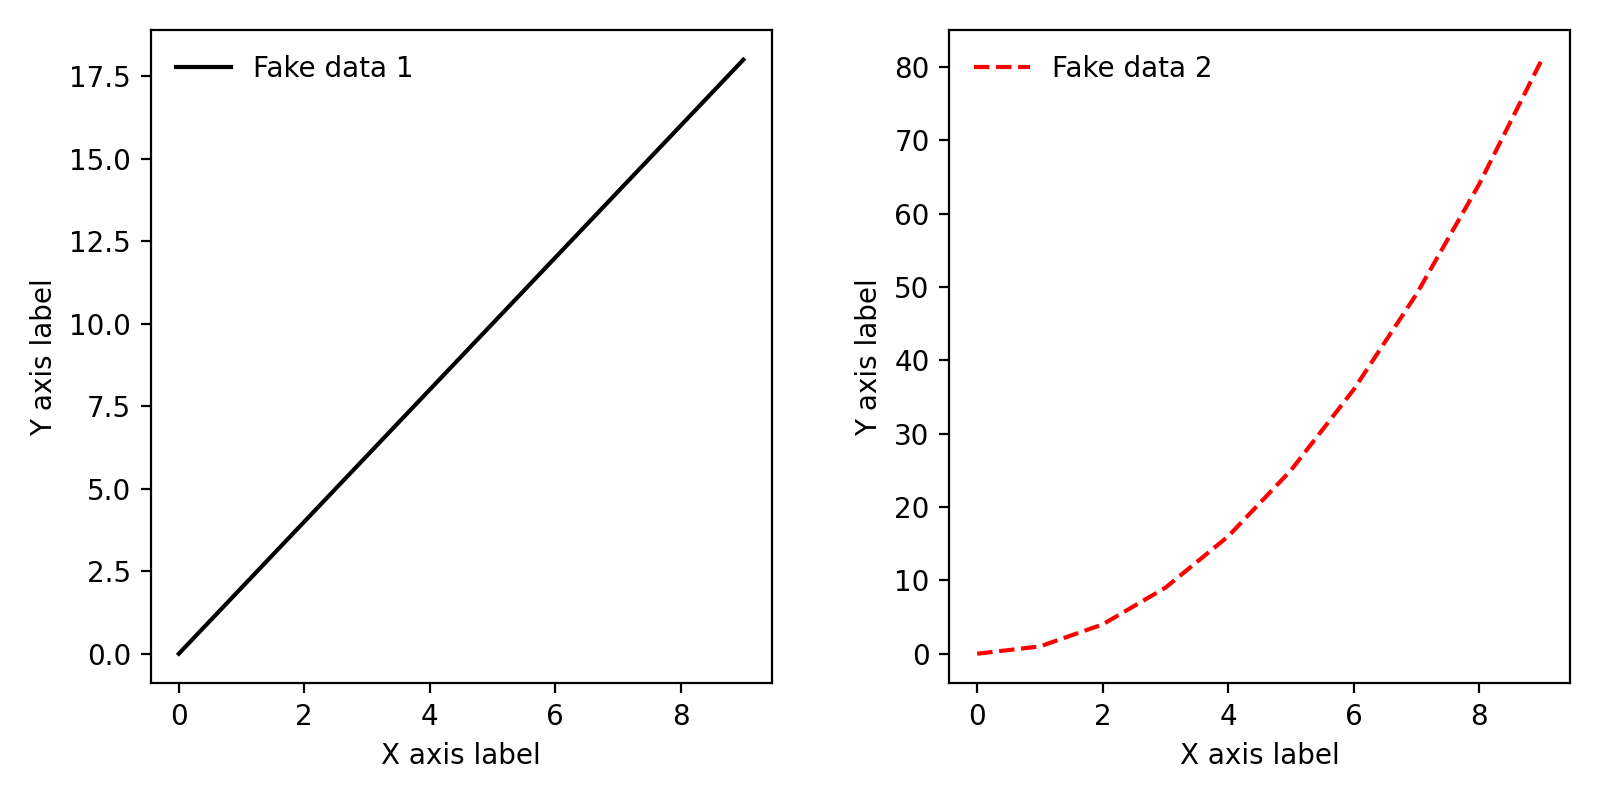

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(x, y, '-', c='k', label='Fake data 1')
axes[1].plot(x, x ** 2, '--', c='r', label='Fake data 2')
axes[0].set_xlabel('X axis label')
axes[1].set_xlabel('X axis label')
axes[0].set_ylabel('Y axis label')
axes[1].set_ylabel('Y axis label')
axes[0].legend(loc='best', frameon=False)
axes[1].legend(loc='best', frameon=False)
fig.tight_layout(w_pad=3.)

## 6. Use python module neuron to create a neuronal cell body compartment and explore the attributes of sections and segments

In [55]:
from neuron import h

In [56]:
soma = h.Section()

In [57]:
help(soma)

Help on Section in module nrn object:

class Section(builtins.object)
 |  Section objects
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __s

In [58]:
# hit "tab" to complete to view valid object attributes
soma.

SyntaxError: invalid syntax (<ipython-input-58-d32c9b3cc347>, line 2)

In [59]:
soma.L

100.0

In [60]:
soma.diam

500.0

In [61]:
# let's use something more in the range of a mouse CA1 pyramidal neuron
soma.L = 20.
soma.diam = 20.

In [62]:
# this is the "specific membrane capacitance" of the section
# depending on the surface area of the compartment, this will slow down the charging and discharging of ions
# when current enters or exits the compartment
soma.cm

1.0

In [63]:
# every unbranched compartment is a "section", and every section can be subdivided into "segments"
# "nseg" is the number of segments, which is 1 by default
soma.nseg

1

In [64]:
# segment objects can be referenced by their relative location from 0.0 to 1.0 within the length of the section
# a single segment is located at the center of the section
seg = soma(0.5)

In [65]:
# the parent section of this segment object is the soma section we created
seg.sec == soma

True

In [66]:
# nseg can be changed, but should always be on odd number so as to maintain a segment in the center position
soma.nseg = 3

In [67]:
# when a section is divided into multiple segments, they are referenced by their center positions within the section
for seg in soma:
    print(seg.x)

0.16666666666666666
0.5
0.8333333333333333


In [68]:
# let's revert to a single segment for now
soma.nseg = 1

## 7. Record voltage from a neuron segment, run a simulation, and plot recorded data

In [69]:
# For some ungodly reason, convenient methods for running simulations in neuron requires that a standard 
# configuration file be explicitly loaded first
h.load_file('stdrun.hoc')

1.0

In [70]:
# The neuron module has it's own datatype for storing array data:
t = h.Vector()
soma_voltage = h.Vector()

In [71]:
len(soma_voltage)

0

In [72]:
h.dt  # Temporal resolution - the time interval between recorded data points in milliseconds

0.025

In [73]:
# Vectors can be set to record attributes of a simulation:
t.record(h._ref_t, h.dt)  # record the time base
soma_voltage.record(soma(0.5)._ref_v, h.dt)  # record the voltage across the membrane in a segment

Vector[1]

In [74]:
h.tstop  # the duration of a simulation in milliseconds

5.0

In [75]:
h.tstop = 600.  # let's set it to 1 second

In [76]:
h.v_init = -65.  # the simulation can be initialized with the neuron's voltage at resting membrane potential

In [77]:
h.run()  # Execute a simulation! Data will be recorded to specified vectors.

0.0

<IPython.core.display.Javascript object>


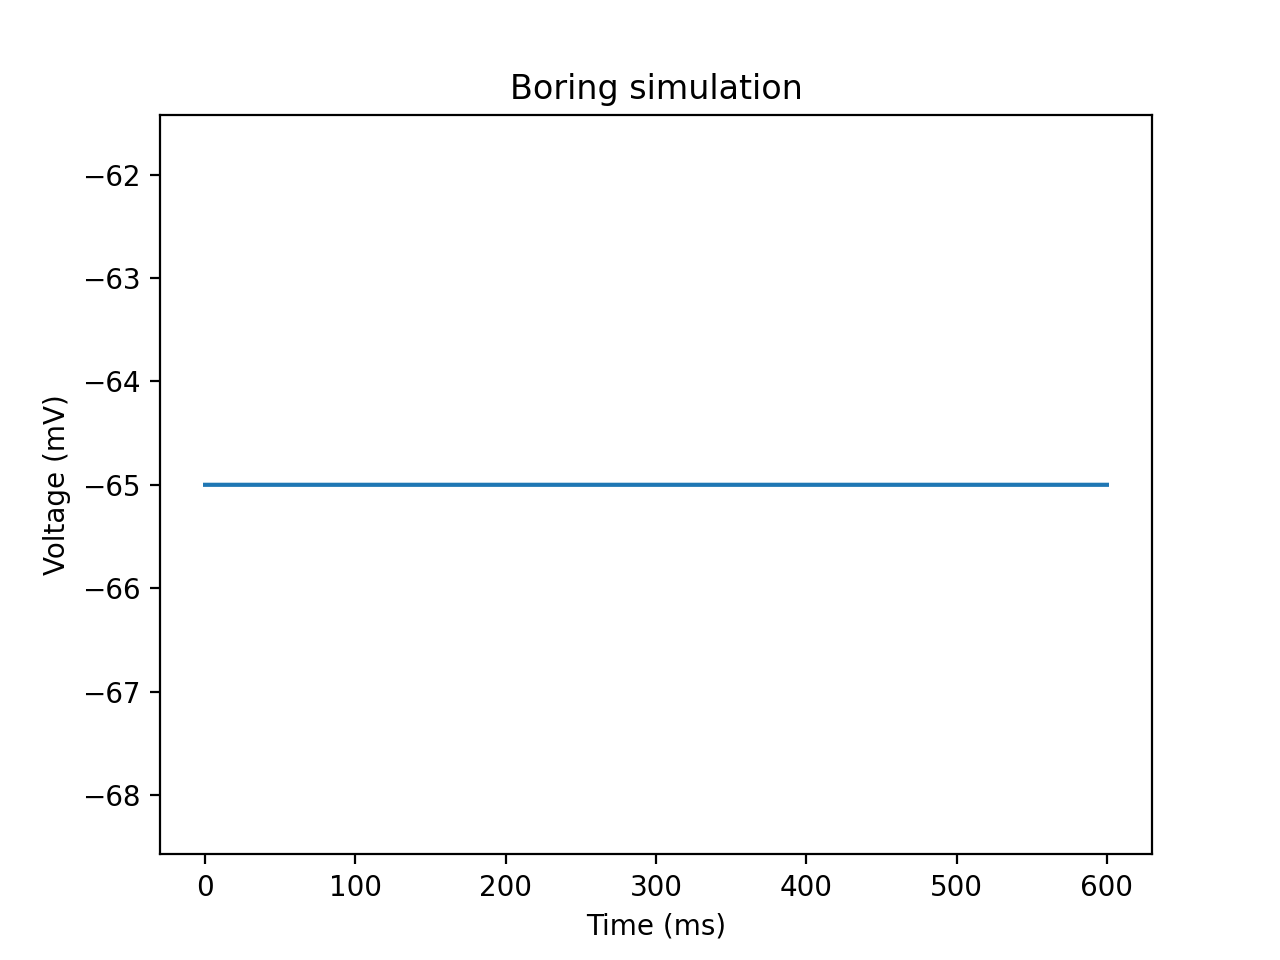

Text(0.5, 1.0, 'Boring simulation')

In [78]:
plt.figure()
plt.plot(t, soma_voltage)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Boring simulation')

In [79]:
# An IClamp object can be inserted into a compartment and used to inject simple square wave current waveforms.
step_current_stim = h.IClamp(soma(0.5))

In [80]:
step_current_stim.amp, step_current_stim.dur, step_current_stim.delay

(0.0, 0.0, 0.0)

In [81]:
step_current_stim.amp = 0.1  # amplitude in nanoAmps
step_current_stim.dur = 200.  # duration in milliseconds
step_current_stim.delay = 200.  # start time of current injection

In [82]:
# the waveform of the current injection can also be recorded into a vector
step_current_rec = h.Vector()
step_current_rec.record(step_current_stim._ref_i, h.dt)

Vector[2]

In [83]:
h.run()

0.0

<IPython.core.display.Javascript object>


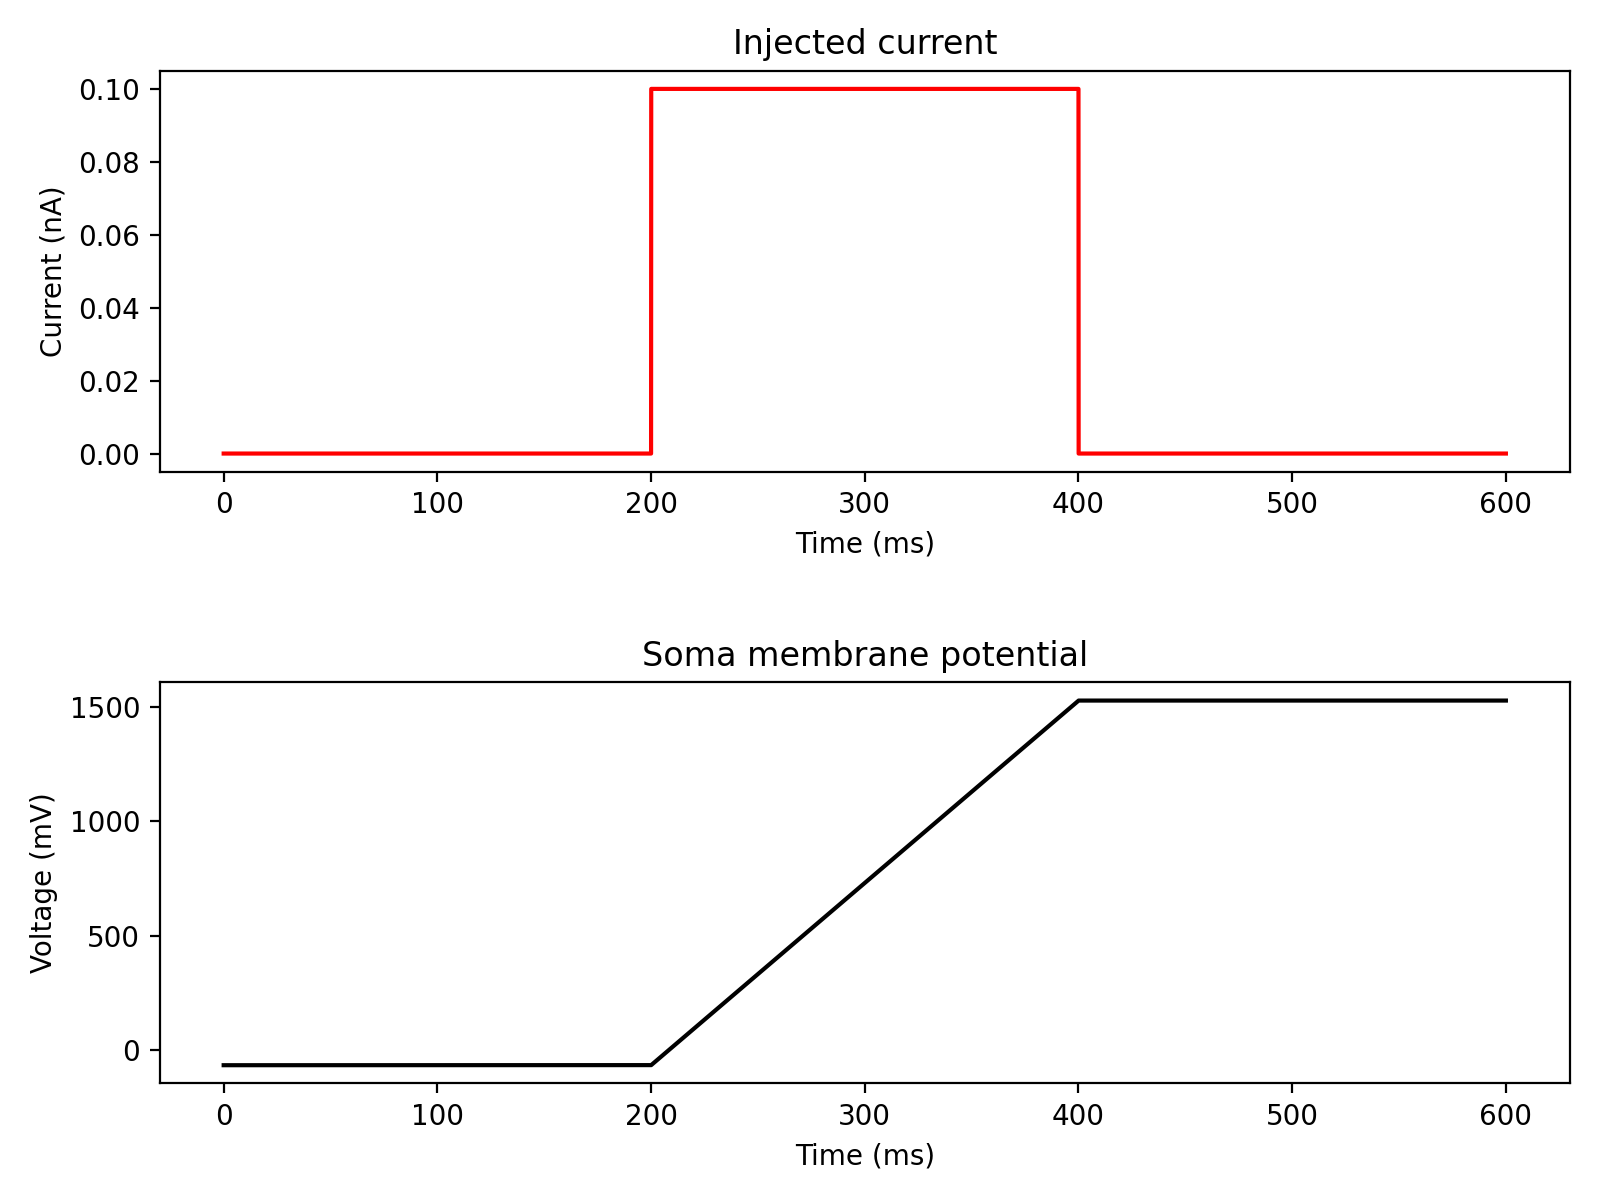

In [84]:
fig, axes = plt.subplots(2, figsize=(8, 6))
axes[0].plot(t, step_current_rec, c='r')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Current (nA)')
axes[0].set_title('Injected current')
axes[1].plot(t, soma_voltage, c='k')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Voltage (mV)')
axes[1].set_title('Soma membrane potential')
fig.tight_layout(h_pad=3.)


### Discussion:
What happened here? Why?

## 8. Organize recordings and superimpose results from multiple simulations

### Exercise:
- Use lists and/or dictionaries to label and organize input parameters and output recordings of time, voltage, and injected current from multiple simulations.  
- Run a few simulations that vary the amplitude, duration, and start time of current injections.

In [85]:
# To permanently store the data from the previous simulation, write the contents of neuron vectors into numpy arrays:
last_soma_voltage = np.array(soma_voltage)
last_t = np.array(t)
last_step_current_rec = np.array(step_current_rec)

Aim for being able to execute something like this pseudocode:  
`for this_stim in stim_list: 
    set the attributes of the stim  
    run the simulation
    create a data structure containing the simulation results and a description
    append the output data structure to a list
 fig, axes = plt.subplots(2, figsize=(8, 6))
 for i, this_stim in enumerate(stim_list):
     this_output = output_list[i]
     plot current injection and soma voltage recording for this_output, with descriptive label
 add a legend`

## 9. Insert an ion channel into the membrane of a neuron section and explore its attributes

The injected current in the above simulations had nowhere to go!  
Real neurons have ion channels and pumps to pass current across the membrane.

In [86]:
# Let's insert into our soma section a standard mechanism called "pas"
# It mimics a type of channel called a "leak" channel that typically fluxes positive ions
soma.insert('pas')

__nrnsec_0x7f8878970000

In [87]:
# now the segments in the soma section have a new set of attributes
leak_mechanism = soma(0.5).pas

In [88]:
# tab to complete to explore mechanism attributes
leak_mechanism.

SyntaxError: invalid syntax (<ipython-input-88-caf70e768800>, line 2)

In [89]:
pas_g0 = 0.001
leak_mechanism.g = pas_g0  # conductance of leak channel in microSeimens
print(leak_mechanism.g)

0.001


In [90]:
# "reversal potential" of the ion channel - the voltage where current through the channel switches from positive to
# negative
pas_e0 = -70.
leak_mechanism.e = pas_e0
print(leak_mechanism.e)

-70.0


In [91]:
# let's run a short simulation without any current injection
step_current_stim.amp = 0.
h.tstop = 200.

In [92]:
# first let's record the current through the leak channel
leak_current_rec = h.Vector()
leak_current_rec.record(soma(0.5).pas._ref_i, h.dt)

Vector[3]

In [93]:
h.run()

0.0

<IPython.core.display.Javascript object>


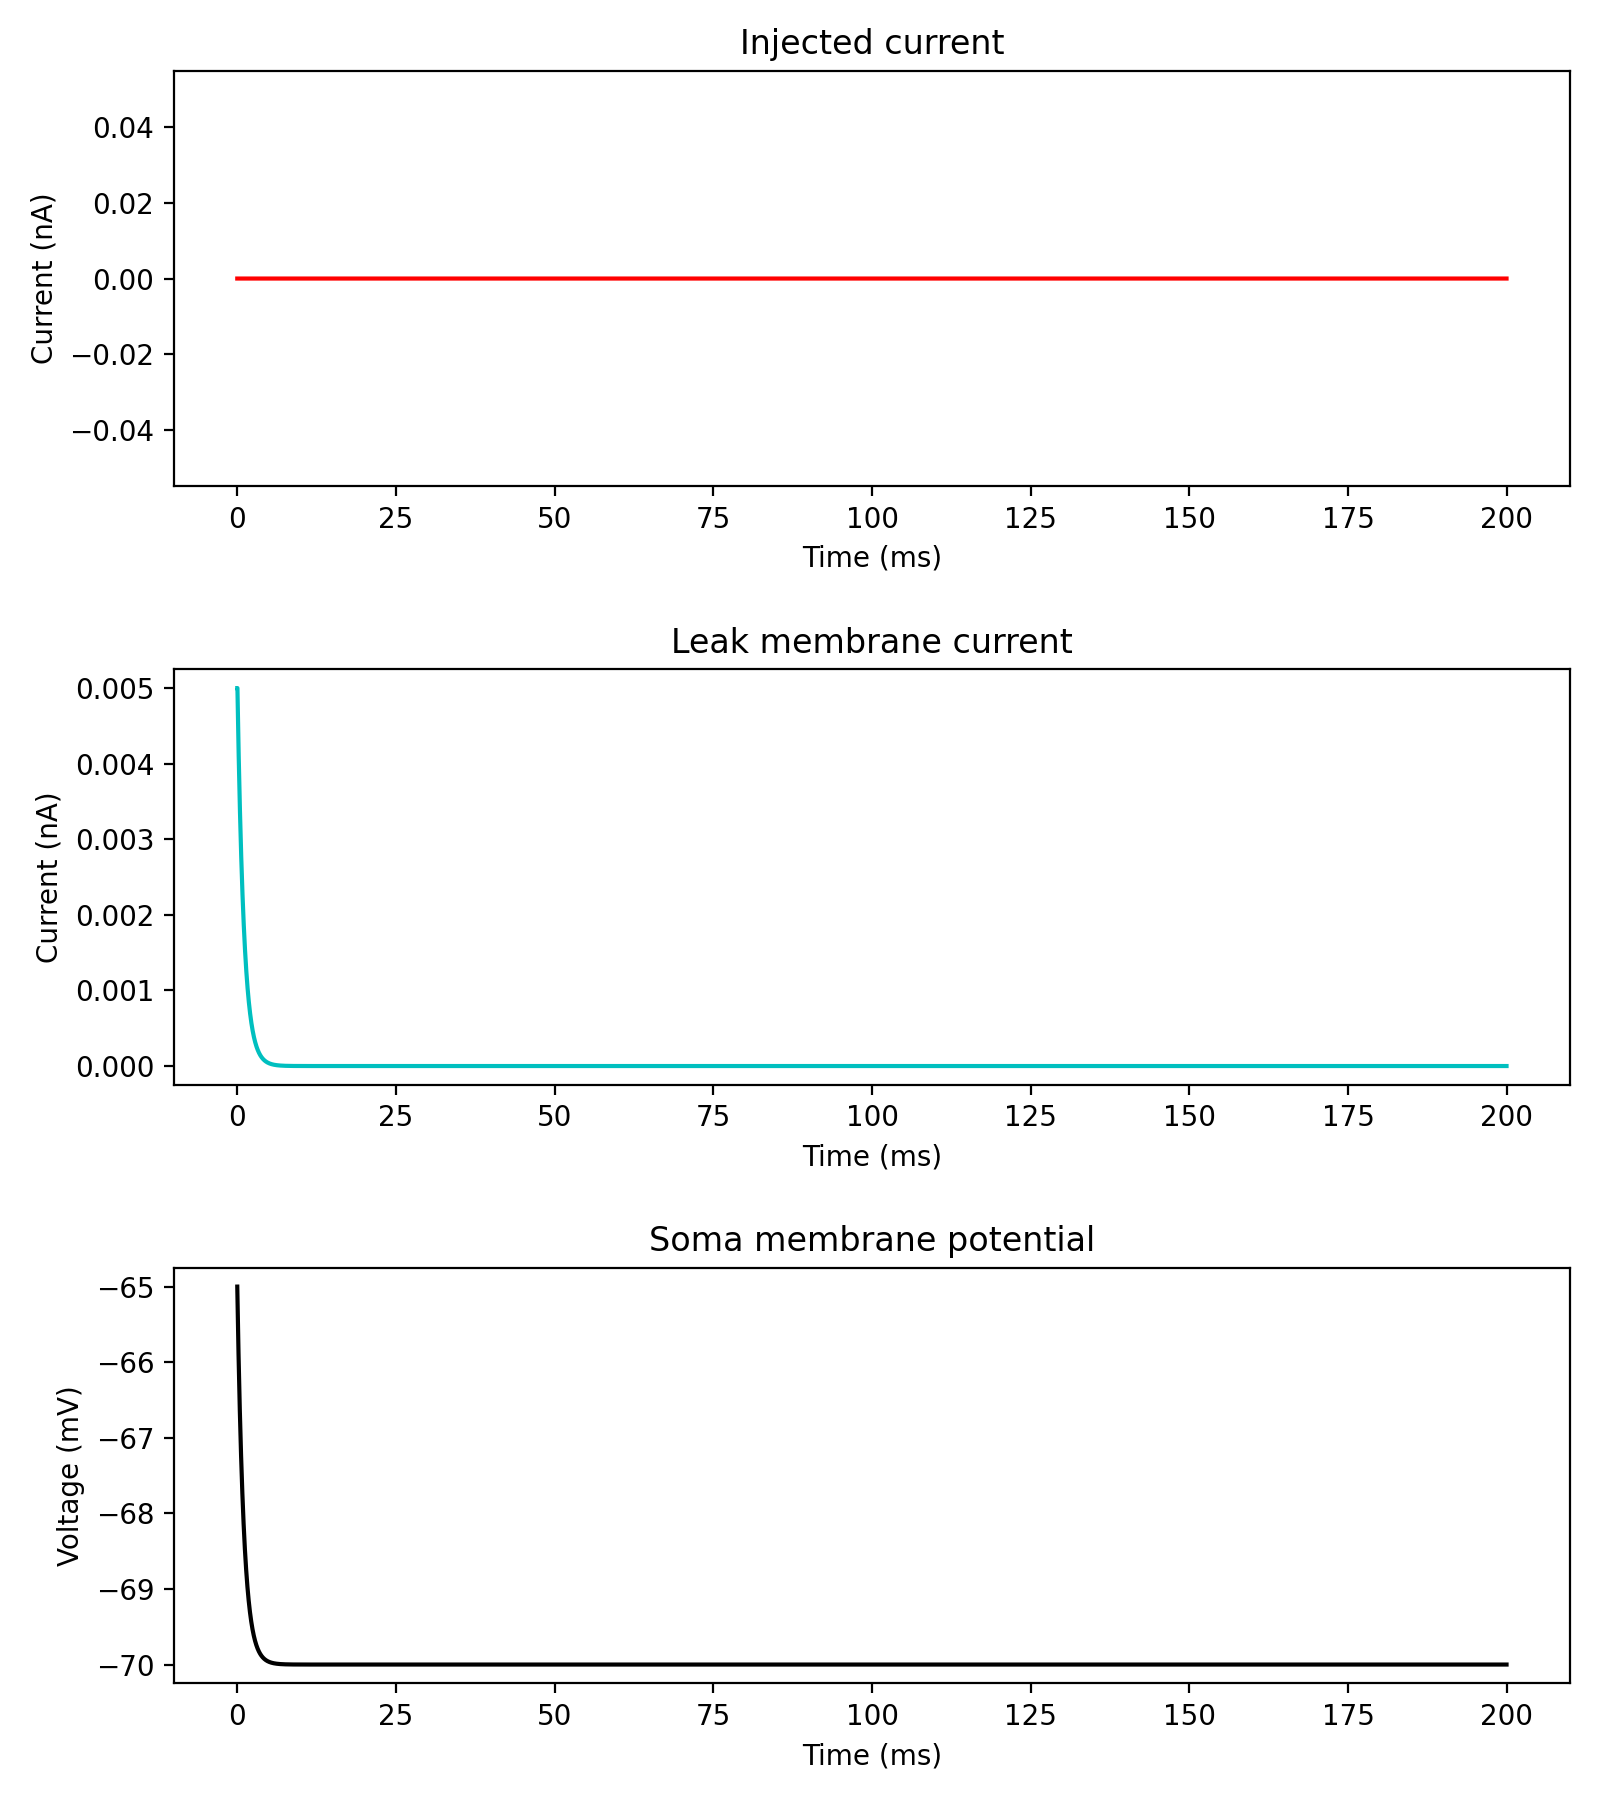

In [94]:
fig, axes = plt.subplots(3, figsize=(8, 9))
axes[0].plot(t, step_current_rec, c='r')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Current (nA)')
axes[0].set_title('Injected current')
axes[1].plot(t, leak_current_rec, c='c')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Current (nA)')
axes[1].set_title('Leak membrane current')
axes[2].plot(t, soma_voltage, c='k')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].set_title('Soma membrane potential')
fig.tight_layout(h_pad=2.)

<IPython.core.display.Javascript object>


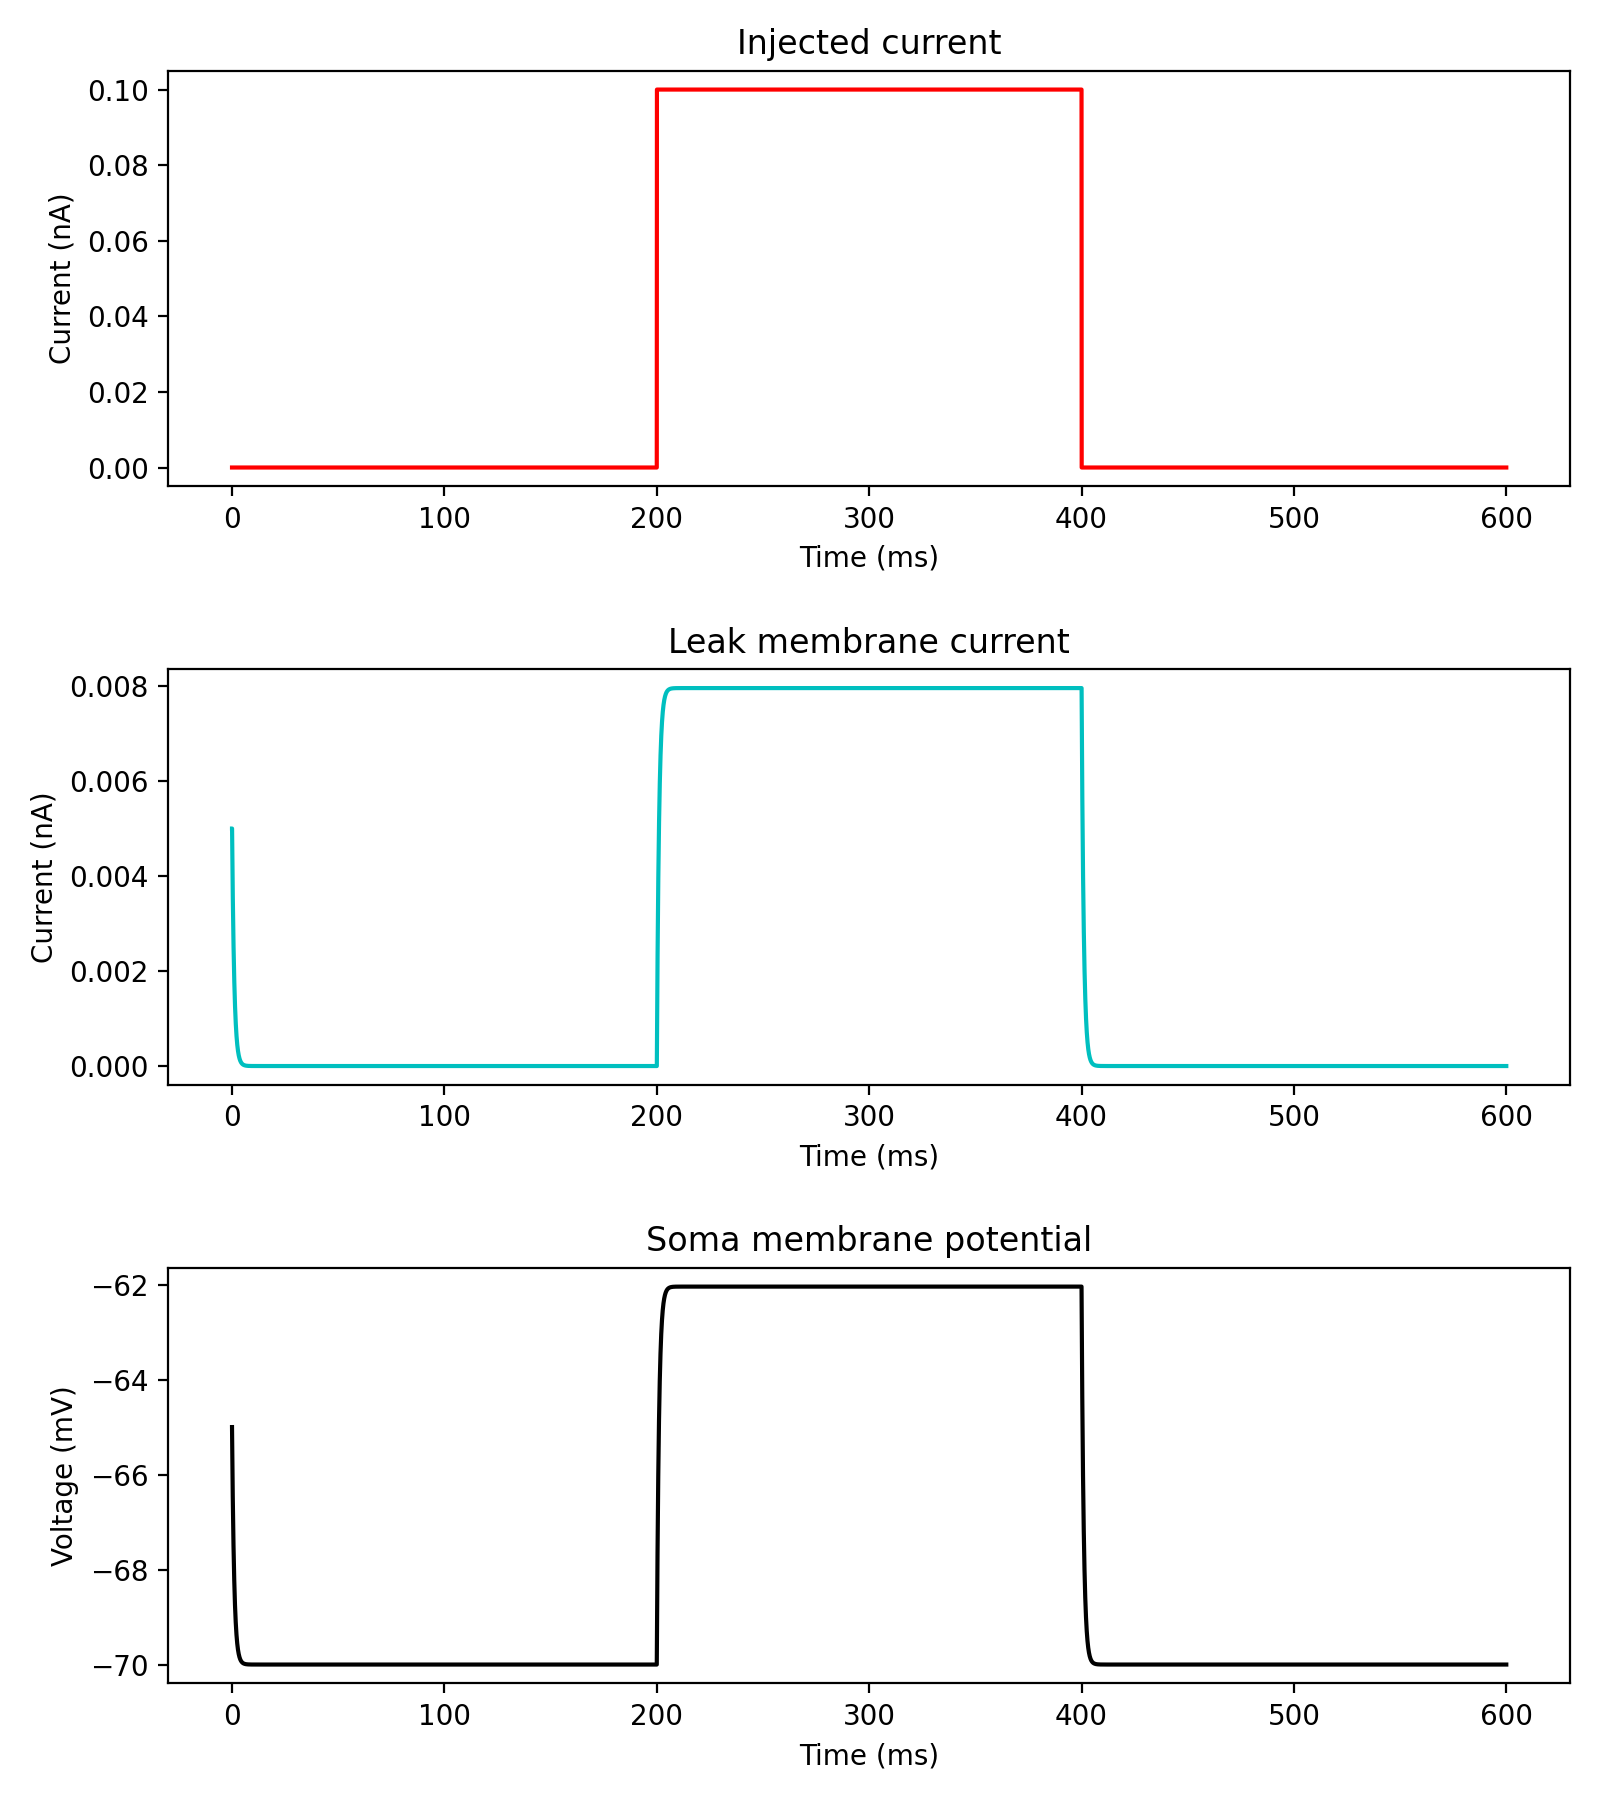

In [96]:
# let's turn our step current injection back on and restore the longer sim duration
step_current_stim.amp = 0.1
h.tstop = 600.
h.run()

fig, axes = plt.subplots(3, figsize=(8, 9))
axes[0].plot(t, step_current_rec, c='r')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Current (nA)')
axes[0].set_title('Injected current')
axes[1].plot(t, leak_current_rec, c='c')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Current (nA)')
axes[1].set_title('Leak membrane current')
axes[2].plot(t, soma_voltage, c='k')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].set_title('Soma membrane potential')
fig.tight_layout(h_pad=2.)

How does the amplitude and kinetics of the voltage response depend on membrane conductance?

<IPython.core.display.Javascript object>


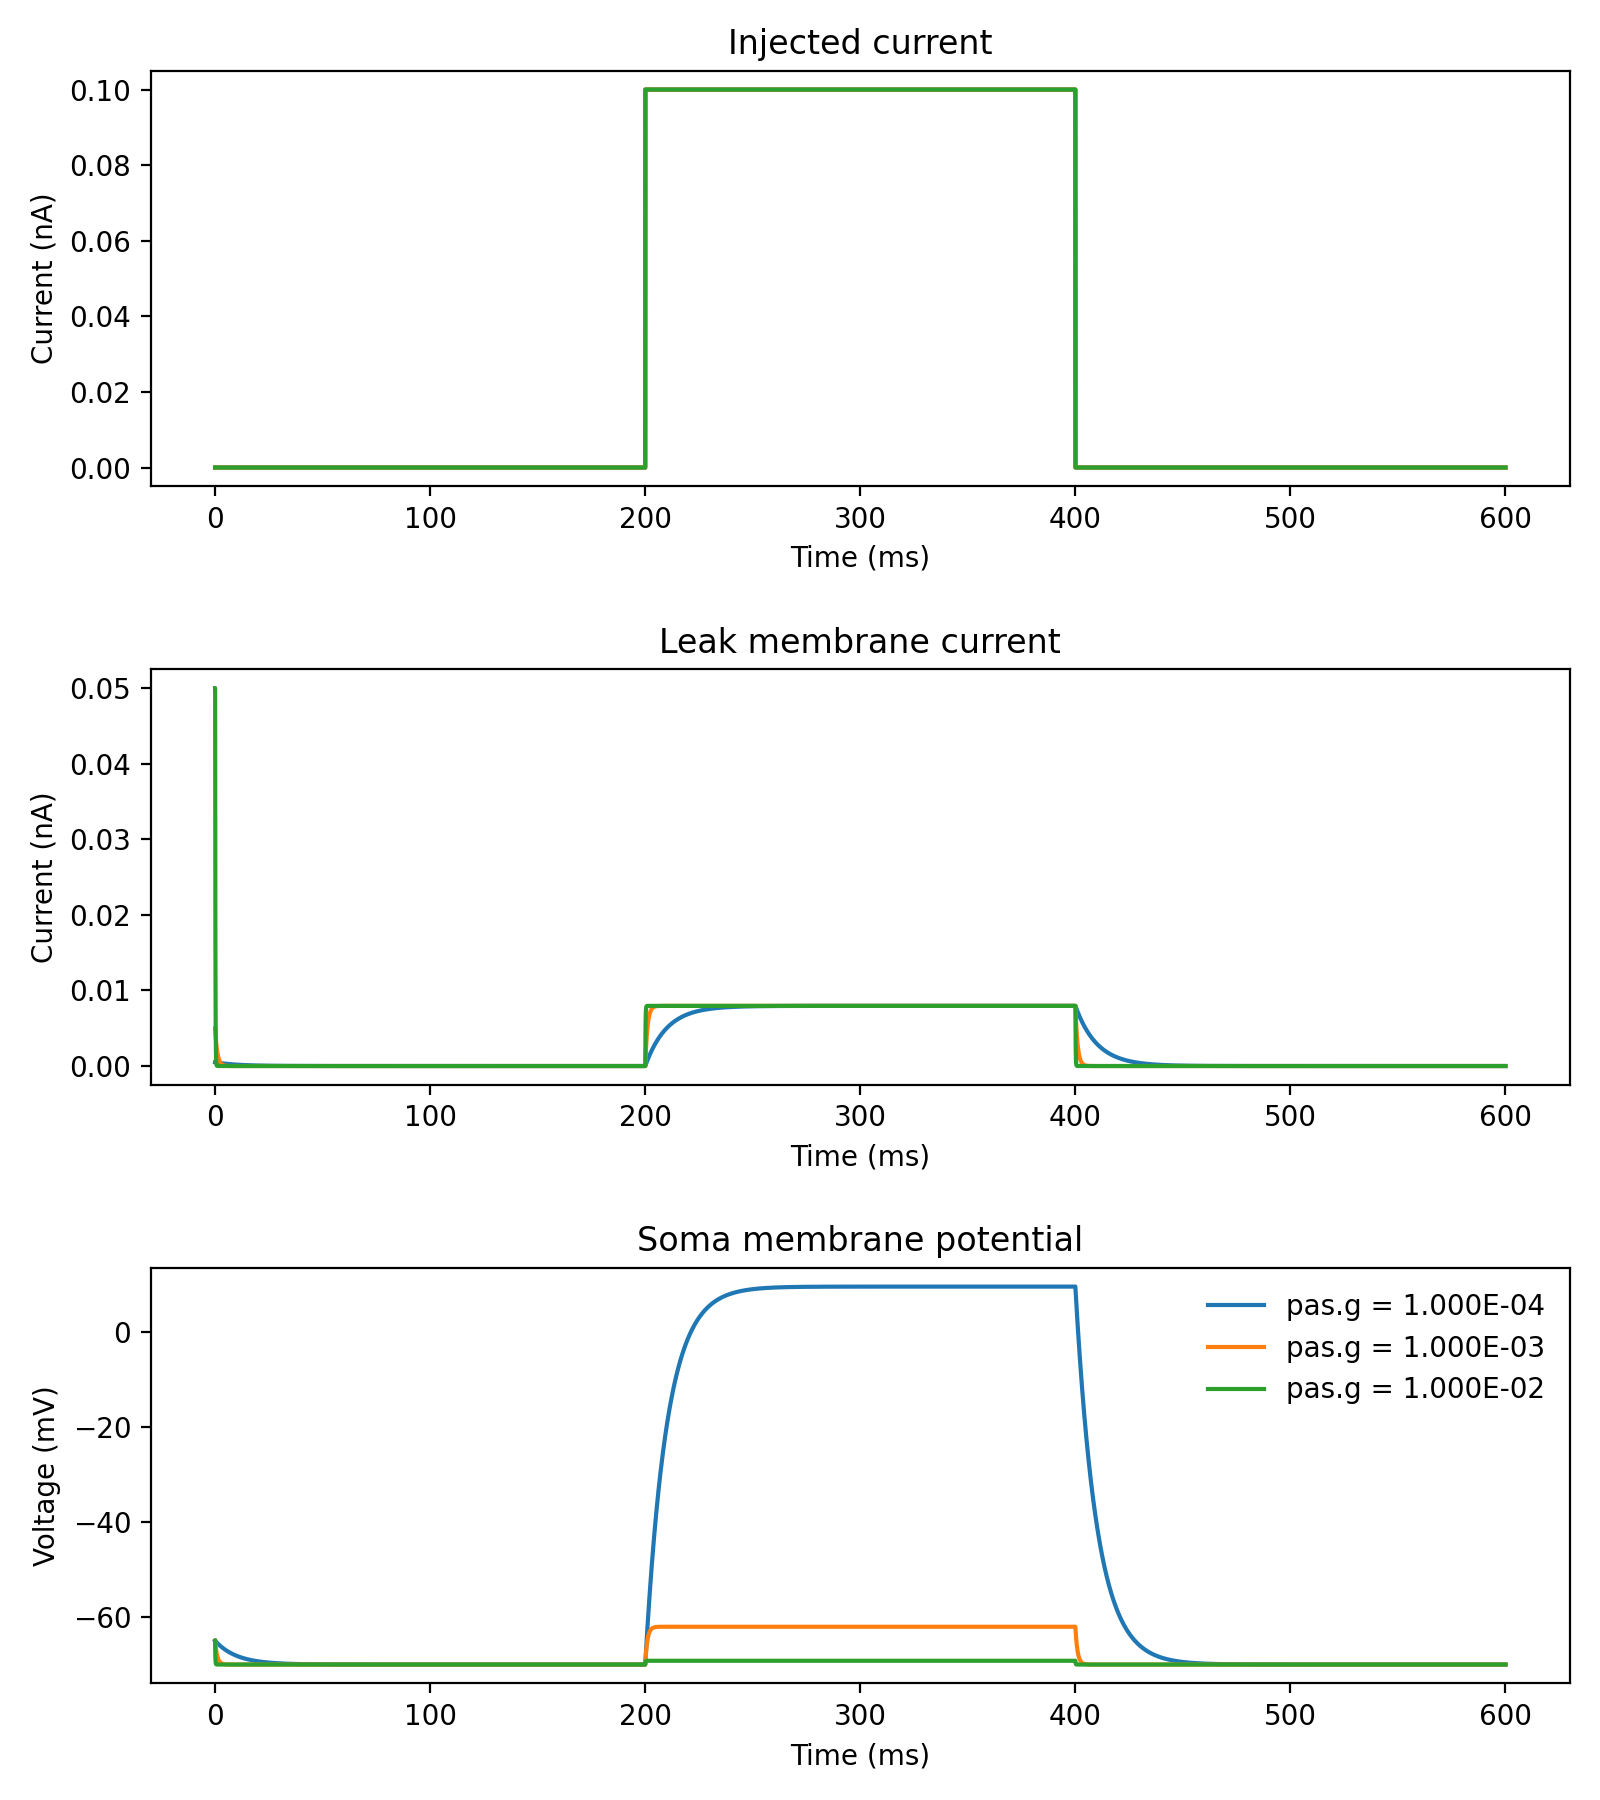

In [98]:
fig, axes = plt.subplots(3, figsize=(8, 9))
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Current (nA)')
axes[0].set_title('Injected current')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Current (nA)')
axes[1].set_title('Leak membrane current')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].set_title('Soma membrane potential')

for g in (pas_g0 / 10., pas_g0, pas_g0 * 10.):
    soma(0.5).pas.g = g
    h.run()
    axes[0].plot(t, step_current_rec)
    axes[1].plot(t, leak_current_rec)
    axes[2].plot(t, soma_voltage, label='pas.g = %.3E' % g)

axes[2].legend(loc='best', frameon=False)
fig.tight_layout(h_pad=2.)
fig.show()

soma(0.5).pas.g = pas_g0

What is the effect of membrane capacitance?

<IPython.core.display.Javascript object>


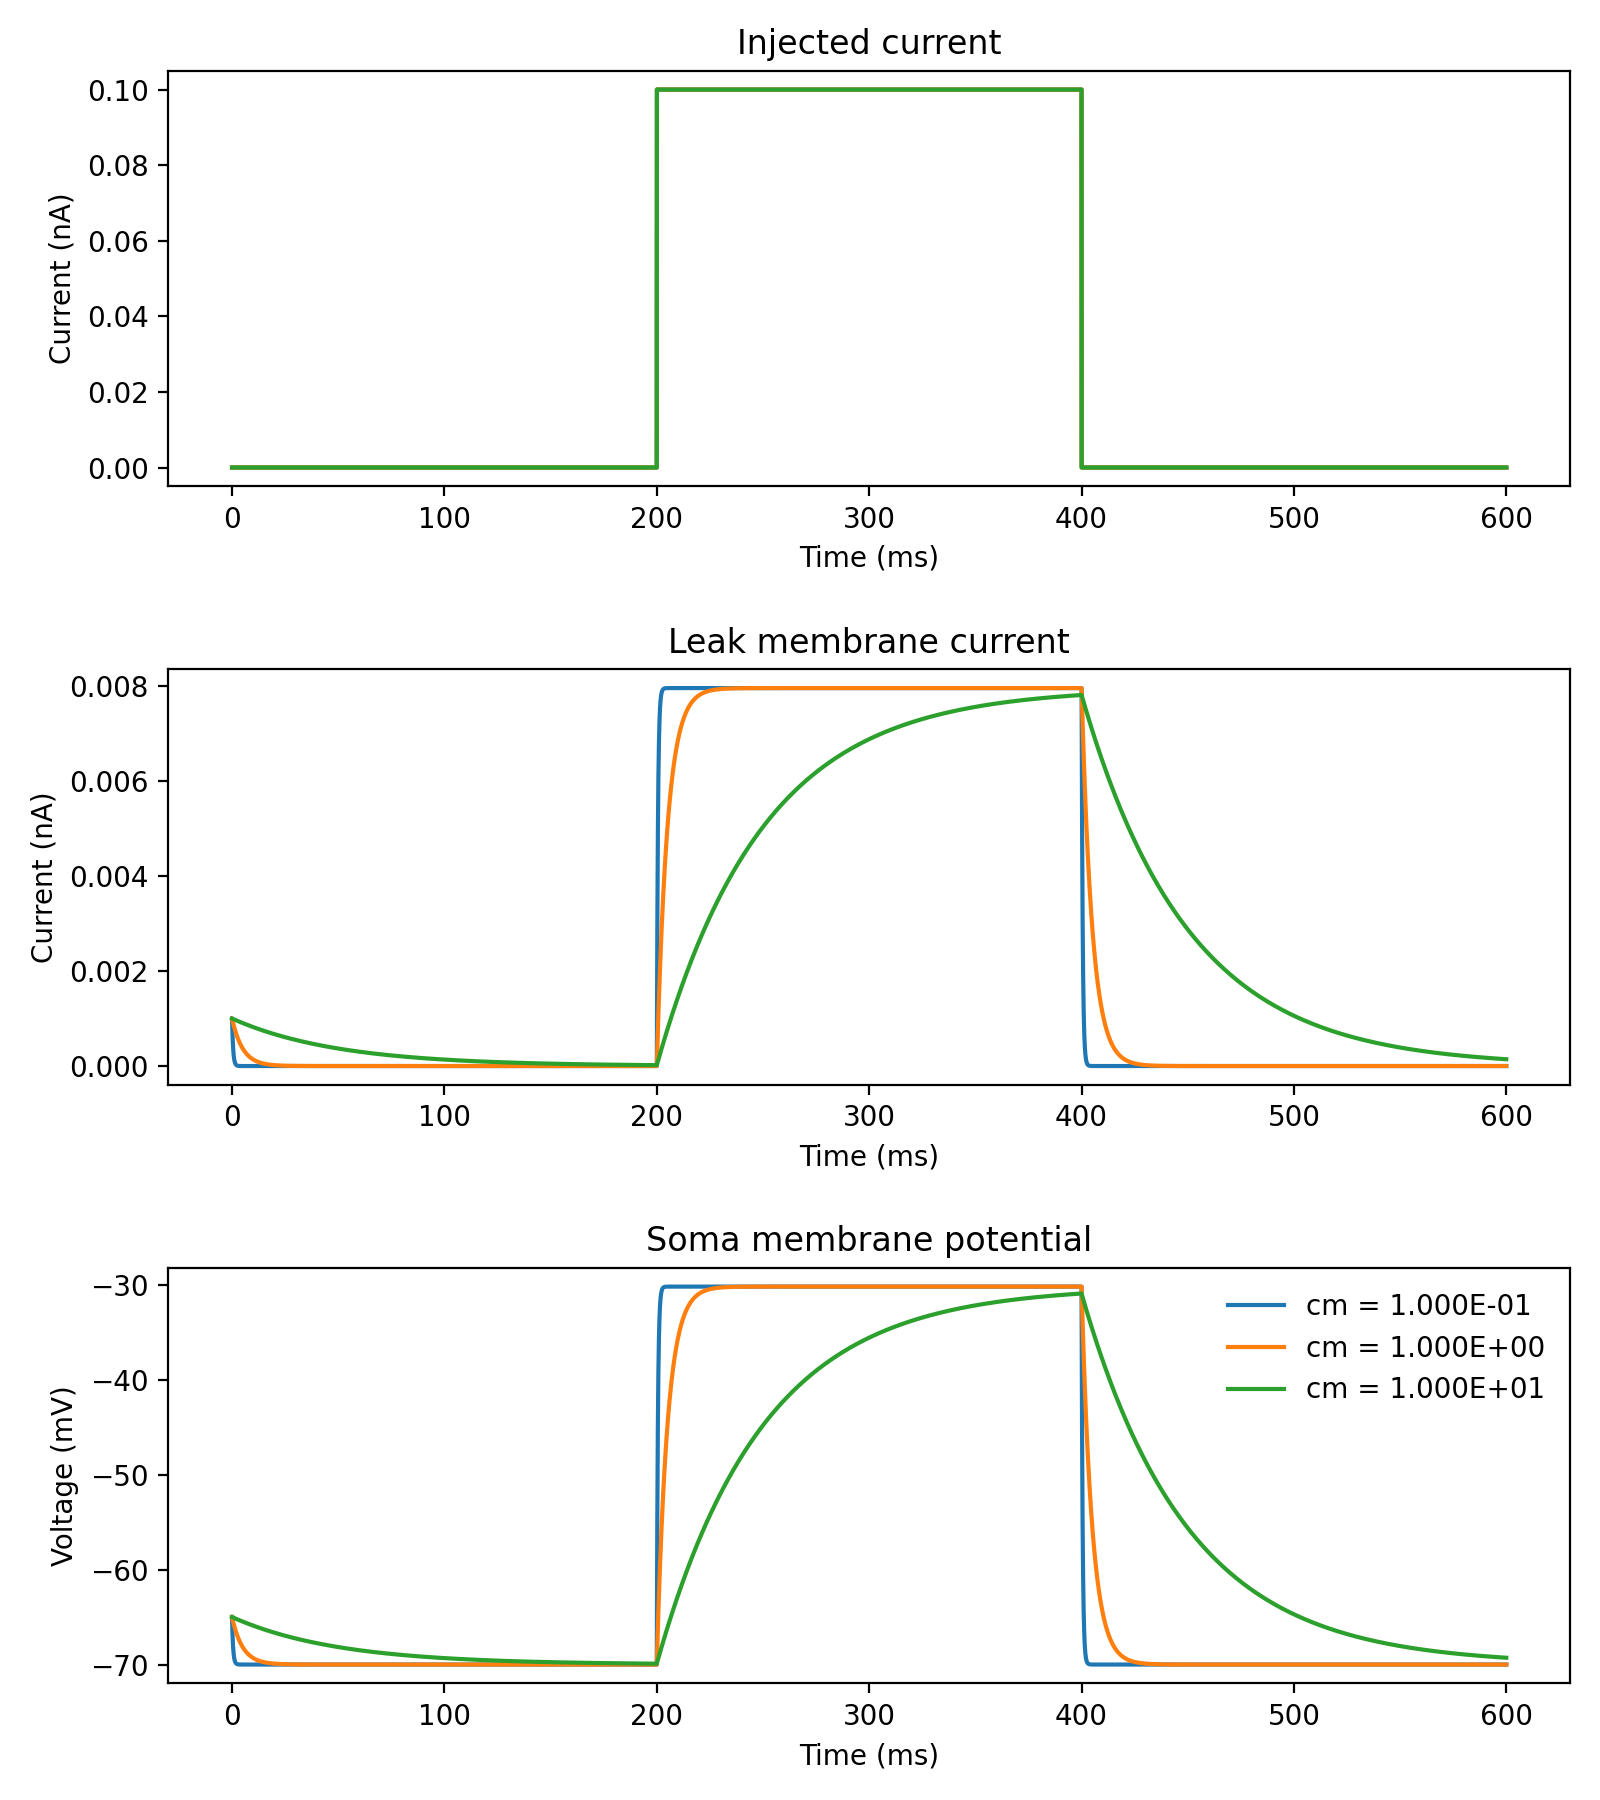

In [99]:
pas_g_new = 2.e-4
soma(0.5).pas.g = pas_g_new
cm0 = 1.

fig, axes = plt.subplots(3, figsize=(8, 9))
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Current (nA)')
axes[0].set_title('Injected current')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Current (nA)')
axes[1].set_title('Leak membrane current')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].set_title('Soma membrane potential')

for cm in (1.e-1, 1., 10.):
    soma.cm = cm
    h.run()
    axes[0].plot(t, step_current_rec)
    axes[1].plot(t, leak_current_rec)
    axes[2].plot(t, soma_voltage, label='cm = %.3E' % cm)

axes[2].legend(loc='best', frameon=False)
fig.tight_layout(h_pad=2.)
fig.show()

soma.cm = cm0

What is the effect of the "reversal potential" of the leak conductance?

<IPython.core.display.Javascript object>


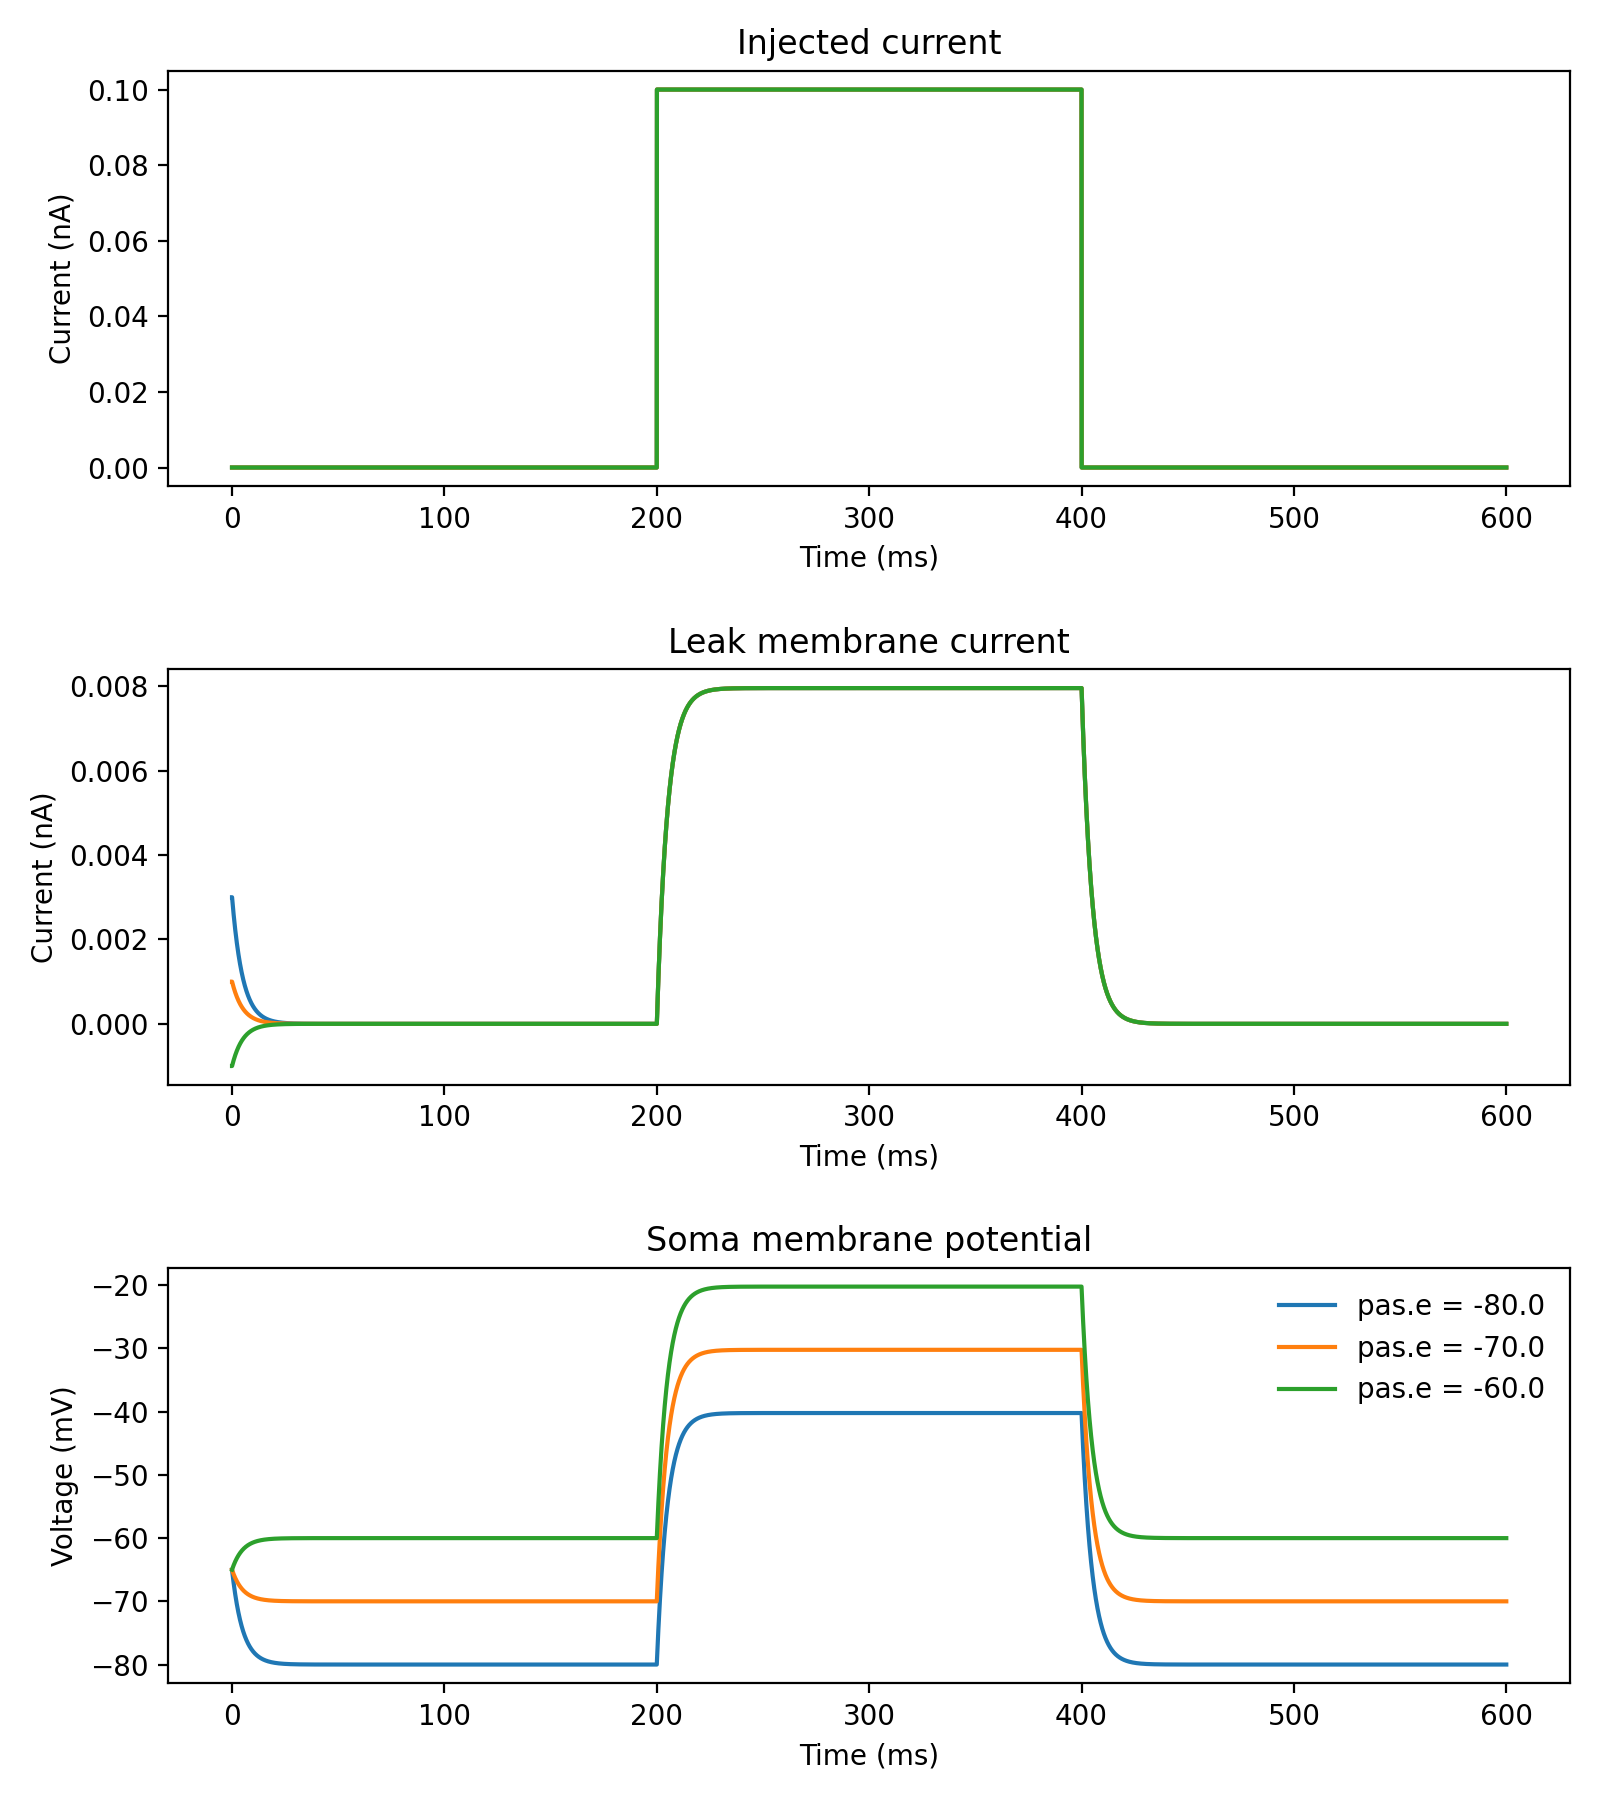

In [100]:
fig, axes = plt.subplots(3, figsize=(8, 9))
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Current (nA)')
axes[0].set_title('Injected current')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Current (nA)')
axes[1].set_title('Leak membrane current')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].set_title('Soma membrane potential')

for e in (-80., -70., -60.):
    soma(0.5).pas.e = e
    h.run()
    axes[0].plot(t, step_current_rec)
    axes[1].plot(t, leak_current_rec)
    axes[2].plot(t, soma_voltage, label='pas.e = %.1f' % e)

axes[2].legend(loc='best', frameon=False)
fig.tight_layout(h_pad=2.)
fig.show()

## 10. Understand and measure the "input resistance" of a neuron compartment

In [102]:
# let's calibrate pas.e to be equal to a resting membrane potential of -65 mV
pas_e_new = -65.
soma(0.5).pas.e = pas_e_new

<IPython.core.display.Javascript object>


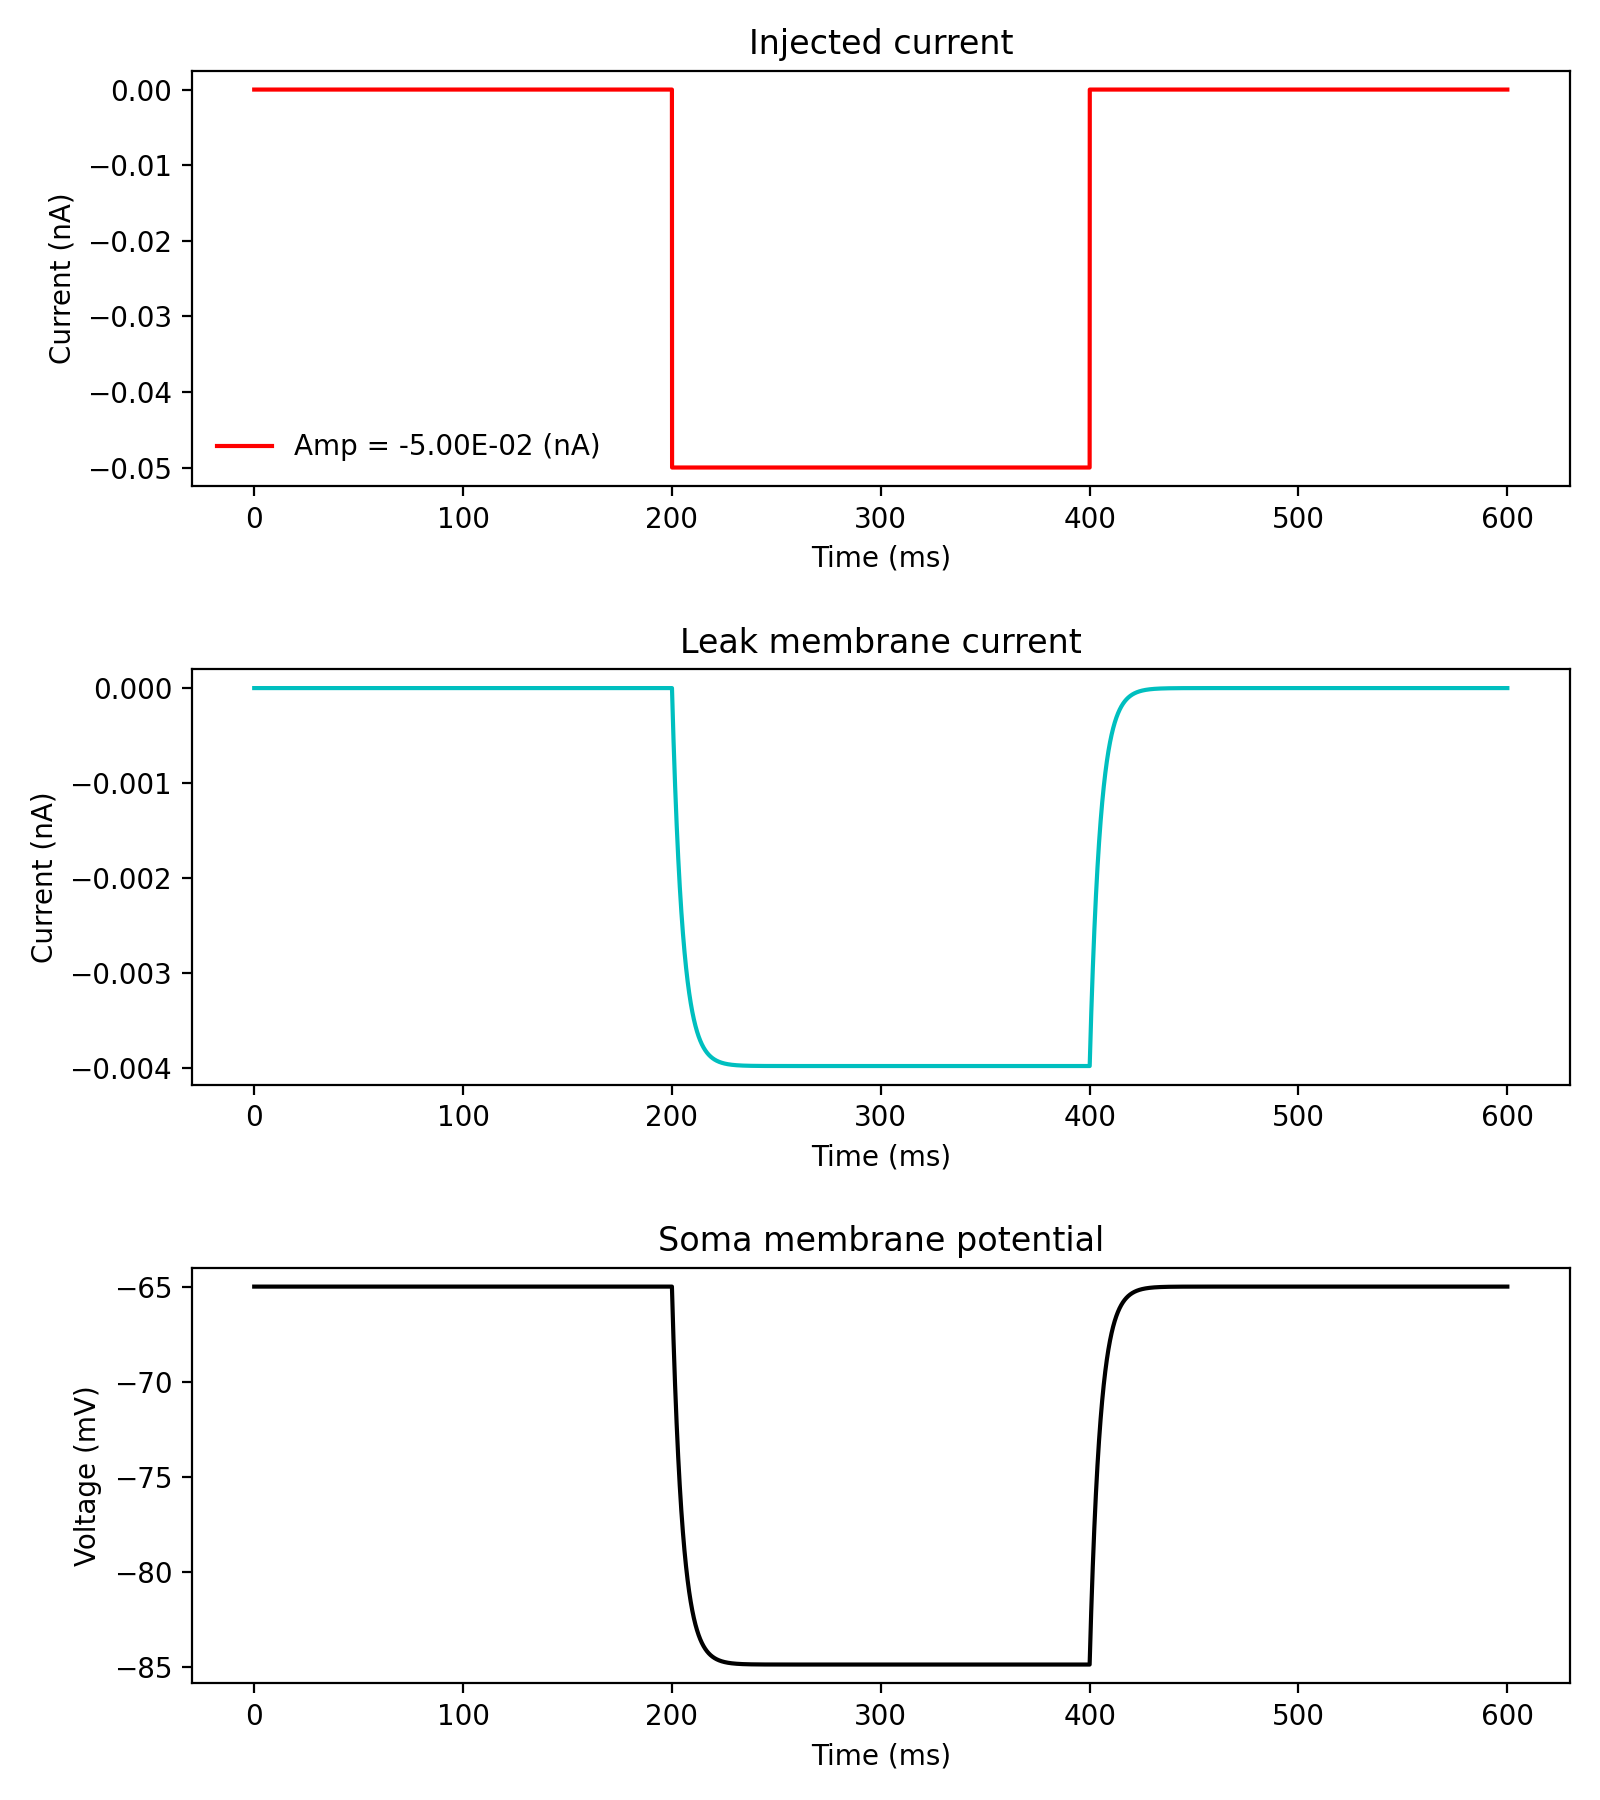

In [104]:
# let's try a negative (hyperpolarizing) current injection this time
step_current_stim.amp = -0.05
h.run()
fig, axes = plt.subplots(3, figsize=(8, 9))
axes[0].plot(t, step_current_rec, c='r', label='Amp = %.2E (nA)' % step_current_stim.amp)
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Current (nA)')
axes[0].set_title('Injected current')
axes[1].plot(t, leak_current_rec, c='c')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Current (nA)')
axes[1].set_title('Leak membrane current')
axes[2].plot(t, soma_voltage, c='k')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].set_title('Soma membrane potential')
axes[0].legend(loc='best', frameon=False)
fig.tight_layout(h_pad=2.)

The "input resistance" of a compartment describes how sensitive the membrane voltage response is to changes in the amount of current flowing across the membrane.  

Ohm's Law:  `V = i * R`  # change in membrane voltage (Volts) = change in membrane current (Amps) * membrane resistance (Ohms)  

Conductance is the inverse of resistance: `g = 1 / R`

The current through a channel depends on the difference between the membrane voltage and the reversal potential of the ion channel: `pas_i = pas_g * (V - pas_e)`

In [109]:
# let's measure the input resistance from the above simulation:
soma_voltage_array = np.array(soma_voltage)
t_array = np.array(t)
step_current_amp = step_current_stim.amp

In [111]:
# find time points and corresponding indexes for baseline at equilibrium, and during the current injection at 
# equilibrium:
baseline_eq_indexes = np.where((195. <= t_array) & (t_array < 200.))
step_eq_indexes = np.where((395. <= t_array) & (t_array < 400.))
baseline_eq_Vm  = np.mean(soma_voltage_array[baseline_eq_indexes])
step_eq_Vm = np.mean(soma_voltage_array[step_eq_indexes])
print(baseline_eq_Vm, step_eq_Vm)

-65.0 -84.89436788648548


In [114]:
delta_Vm = abs(baseline_eq_Vm - step_eq_Vm)
R_inp = (delta_Vm / 1000.) / (abs(step_current_amp) / 1e9) / 1e6 # convert mV to V, nA to A, and Ohm to MegaOhm
print(R_inp)

397.8873577297096


### Challenge:
Can you use scipy to optimize the value of pas.g to achieve a target R_inp of 150 MOhm?

### Other resources:
- https://www.neuron.yale.edu/neuron/static/py_doc/programming/python.html
- https://neuron.yale.edu/neuron/docs/scripting-neuron-basics
- https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html